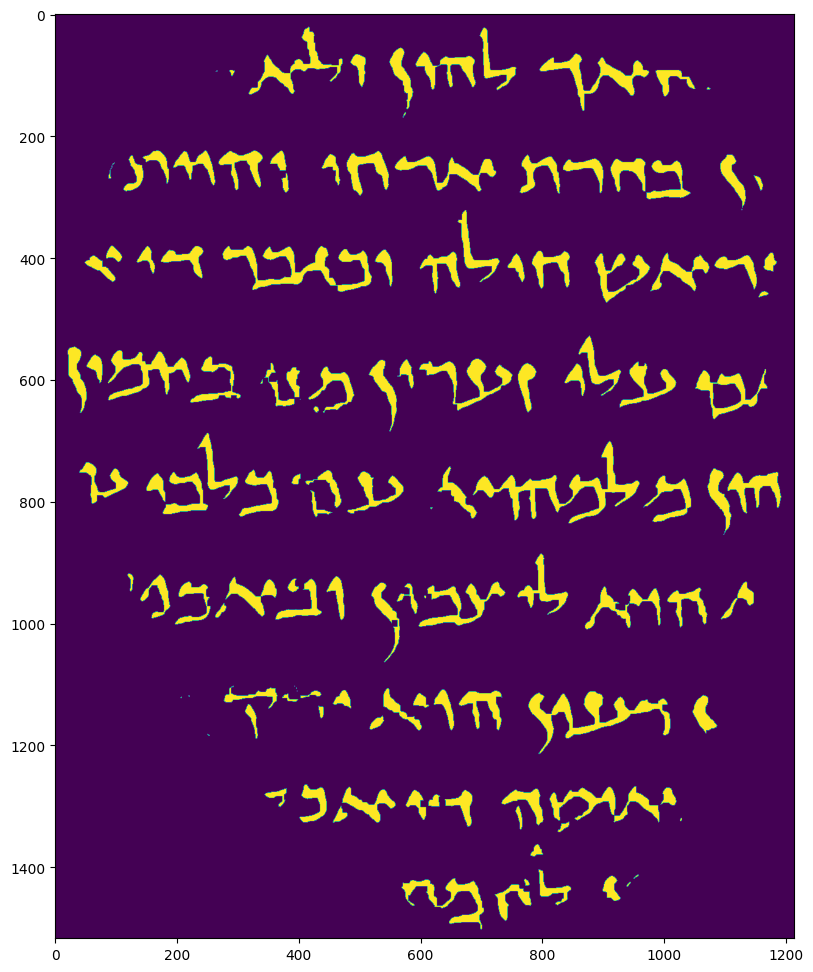

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from data_management.augmentation.commonAug import whitespaceRemover

gray_img = cv2.imread('image-data\P632-Fg002-R-C01-R01-binarized.jpg', cv2.IMREAD_GRAYSCALE)

#drawing_img = image.copy()


gray_img = whitespaceRemover(img=gray_img, padding=20)


inv_gray_img = cv2.bitwise_not(gray_img)
blurred = cv2.GaussianBlur(inv_gray_img, (11, 11), 0)

#thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
#_, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_OTSU)

#blurred = cv2.GaussianBlur(gray_img, (11, 11), 0)


thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

_, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_OTSU)
#thresholded = cv2.bitwise_not(thresholded)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel, iterations=2)

# erode 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
morph = cv2.morphologyEx(morph, cv2.MORPH_ERODE, kernel)


_, thresholded = cv2.threshold(morph, 0, 255, cv2.THRESH_OTSU)


#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
#thresholded = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(20,12))
plt.imshow(thresholded)
plt.show()


In [22]:
blurred = cv2.GaussianBlur(gray_img, (11, 11), 0)
thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# open
morph = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)
# close
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)

# dilate 
morph = cv2.morphologyEx(morph, cv2.MORPH_DILATE, kernel)

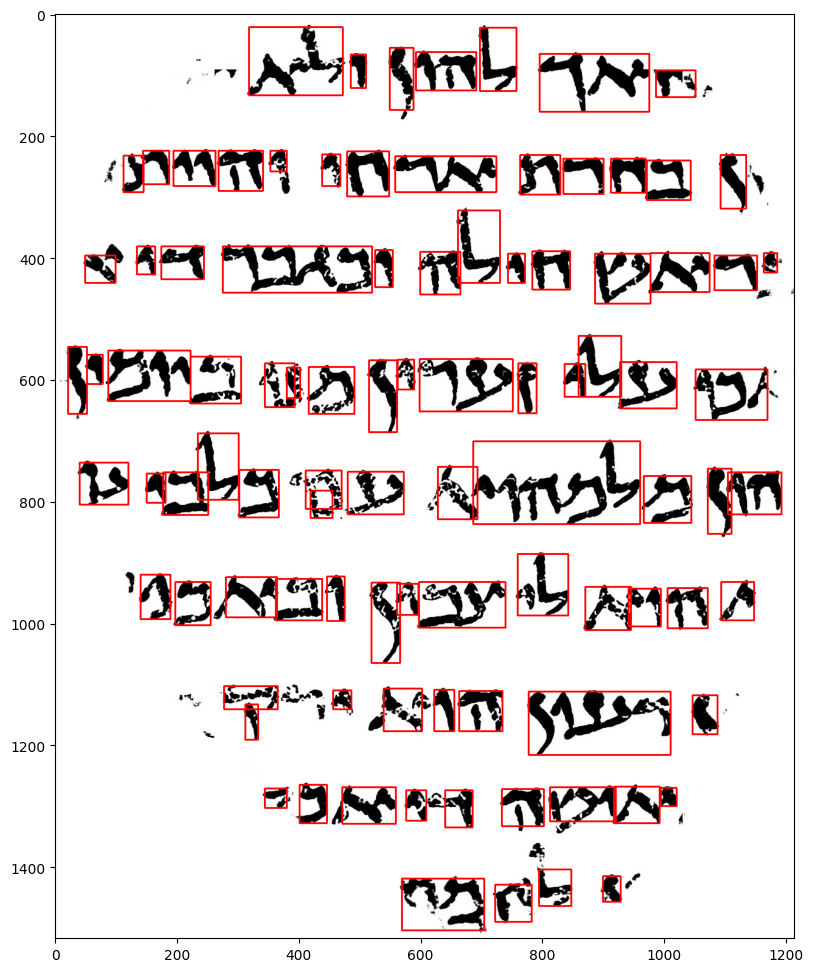

In [27]:
morph = thresholded.copy()


drawing_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)

ret, labels = cv2.connectedComponents(morph)

#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
#morph = cv2.morphologyEx(morph, cv2.MORPH_DILATE, kernel, iterations=1)

contours, hierarchy = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for label in range(1, ret):
    component = np.uint8(labels == label) * 255
    
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    component =  cv2.dilate(component, (3,3))

    contours, _ = cv2.findContours(component, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # filter out small or invalid bounding boxes
    for j, contour in enumerate(contours):
            (x, y, w, h) = cv2.boundingRect(contour)
            # these are artifacts
            if (w < 20 or h < 30):
                continue

            drawing_img = cv2.rectangle(drawing_img, (x,y), (x+w, y+h), color = (255,0,0), thickness=2)


plt.figure(figsize=(20,12))
plt.imshow(drawing_img)
plt.show()

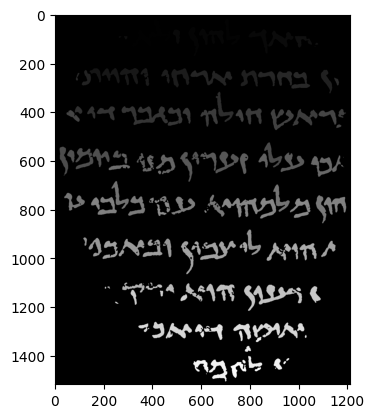

In [340]:
plt.imshow(labels, cmap='gray')

In [156]:
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)

def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store

#plt.imshow(thresholded)

image = thresholded

init_ls = checkerboard_level_set(image.shape, 6)


init_ls = checkerboard_level_set(image.shape, 20)

evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, num_iter=20, init_level_set=init_ls,
                             smoothing=0, iter_callback=callback)

Text(0.5, 1.0, 'Morphological ACWE segmentation')

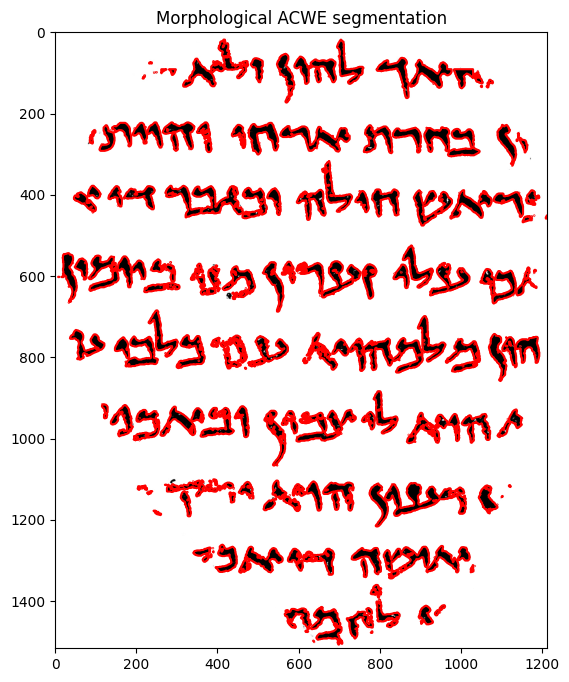

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#ax = axes.flatten()

plt.imshow(image, cmap="gray")
#plt.axis_off()
plt.contour(ls, [0.5], colors='r')
plt.title("Morphological ACWE segmentation", fontsize=12)

In [63]:
gimage = inverse_gaussian_gradient(image)

# Initial level set
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
lsGAC = morphological_geodesic_active_contour(gimage, num_iter=230,
                                           init_level_set=init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.69,
                                           iter_callback=callback)



KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#ax = axes.flatten()

plt.imshow(image, cmap="gray")
#plt.axis_off()
plt.contour(lsGAC, [0.5], colors='r')
plt.title("Morphological ACWE segmentation", fontsize=12)